# Numpy 개요

- 공식 사이트 : https://numpy.org
- 고성능 수치 해석용 Python 라이브러리
- Numpy는 고성능 다차원 배열과 이런 배열을 처리하는 다양한 함수와 툴을 제공

    - 사용 목적 : 데이터 분석X (예측, 분류, 특징 찾아내기 등..)
    - 사용 목적 : 데이터 다루고 처리만 O

# Python 다차원 배열의 이해

- 세 명의 학생의 수학 점수에 대한 합과 평균 구하기

## 숫자 자료형

In [7]:
# 1. 수학 점수를 변수에 저장하기
math1 = 11
math2 = 12
math3 = 13

# 2. 합과 평균 구하기
total = math1 + math2 + math3
average = total / 3
print(f'수학점수 합계: {total}')
print(f'수학점수 평균: {average:.2f}')

# 만약 학생의 수가 늘어난다면 2번 식을 전부 다 수정해야한다.
# 따라서, 집합형 데이터인 리스트로 관리한다면 더 용이하다.

수학점수 합계: 36점
수학점수 평균: 12.00점


## 리스트 자료형

In [9]:
# 1. 수학 점수를 리스트에 저장하기
math_list = [11,12,13]

# 2. 합과 평균 구하기
total = 0
average = 0

for math in math_list:
    total += math
average = total / len(math_list)

print(f'수학점수 합계: {total}')
print(f'수학점수 평균: {average:.2f}')

# 만약 학생의 수가 늘어난다 하더라도 2번 식을 수정할 필요가 없다.
# math_list에 append해서 새로운 데이터만 추가해주면 된다.

수학점수 합계: 36
수학점수 평균: 12.00


- 시험 문제 오류가 발견되어 모든 학생의 점수를 1점씩 올려줘야 한다면 어떻게 처리할까?

In [ ]:
# list comprehension으로 새로운 리스트를 만들기
math_list = [ math+1 for math in math_list ]

- 과목 수와 반의 수가 늘어나는 등 구조가 확장된다면 어떻게 처리할까?
    - 계속 중첩되는 상황이 발생

In [13]:
# 1반의 점수 11,12,13
# 2반의 점수 21,22,23
# 3반의 점수 31,32,33
## 중첩 리스트를 통해 아래와 같이 나타낼 수 있다.

math_list = [[11,12,13],
             [21,22,23],
             [31,32,33]]
print(math_list)
# [[11, 12, 13], [21, 22, 23], [31, 32, 33]]

# 자료 구조의 중첩이 늘어난만큼 for문도 늘어난다

[[11, 12, 13], [21, 22, 23], [31, 32, 33]]


<font color='red'> 문제점 </font>

    - 자료구조의 중첩이 증가하면 반복문도 하나 더 사용해야 한다.
    - 따라서, 구조의 중첩이 증가할수록 코드는 복잡해진다.
 
     - html의 font 태그가 먹힌다

## Numpy로 구현한 다차원 배열
- Numpy를 사용하면 중첩된 자료구조를 효율적으로 다룰 수 있다.
- import numpy as np 형태로 패키지를 불러와서 사용하는 것이 일반적이다.

In [1]:
import numpy as np

math_list = [[11,12,13],
             [21,22,23],
             [31,32,33]]

# numpy의 array 함수 사용
math_ndarray = np.array(math_list)
print(math_ndarray) ############### 다차원 배열 ################

#[[11 12 13]
# [21 22 23]
# [31 32 33]]
# 컴마도 없고, 행열 구조 그대로 출력된다.

print(type(math_ndarray))
# <class 'numpy.ndarray'>

[[11 12 13]
 [21 22 23]
 [31 32 33]]
<class 'numpy.ndarray'>


In [3]:
# 모든 점수를 1씩 더하기
# for문을 이용하지 않고도, 간단히 연산 가능하다
# element-wise : 요소별로 수치 연산이 이루어진다.

new_ndarray = math_ndarray +1
print(new_ndarray)

[[12 13 14]
 [22 23 24]
 [32 33 34]]


- Numpy에 구현된 함수를 이용해서 합이나 평균도 쉽게 구할 수 있다

In [16]:
# numpy의 sum함수와 mean 함수
# cf) 파이썬에서는 평균을 구하는 함수가 따로 없었다.

print(np.sum(new_ndarray))
print(np.mean(new_ndarray))

207
23.0


In [4]:
# 행의 평균

# 반별 평균 구하기
print(new_ndarray)
np.mean(new_ndarray, axis=1)
# axis : 축
# array([13., 23., 33.])

# '.' 은 실수를 의미한다 : 나중에 형 변환시 학습할 내용

[[12 13 14]
 [22 23 24]
 [32 33 34]]


array([13., 23., 33.])

In [5]:
# 열의 평균

# 각 반의 첫번째 학생 평균 구하기
print(new_ndarray)
np.mean(new_ndarray, axis=0)
# array([22., 23., 24.])

# '.' 은 실수를 의미한다 : 나중에 형 변환시 학습할 내용

[[12 13 14]
 [22 23 24]
 [32 33 34]]


array([22., 23., 24.])

# Numpy의 axis(축) 정리

- Numpy 라이브러리의 여러 함수에서는 axis 파라미터가 사용되며, 다음과 같이 해석할 수 있다.
- 먼저 행열의 모양을 다음과 같이 학인한다.
    - ndarray.shape (행열객체.shape)
        - 튜플의 형태로 결과 반환
        - 1차원 벡터: (개수,) / axis 0
        - 2차원 행렬: (행, 열) / axis0과 axis1
        - 3차원 행렬: (깊이, 행, 열) / axis0과 axis1과 axis2

## 2차원 행렬의 축
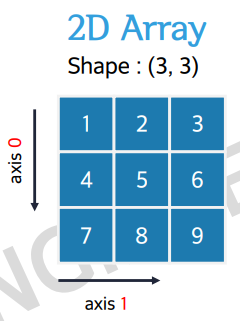
- ctrl + n
- axis를 0(또는 -2)로 하면 행 축을 기준으로 더하라는 의미로, 각 행에 있는 열의 값을 더해 하나로 만든다.
- axis를 1(또는 -1)로 하면 열 축을 기준으로 더하라는 의미로, 각 열에 있는 행의 값을 더해 하나로 만든다.

In [ ]:
new_ndarray.shape
# (3, 3)
# 3행 3열

## 3차원 행렬의 축
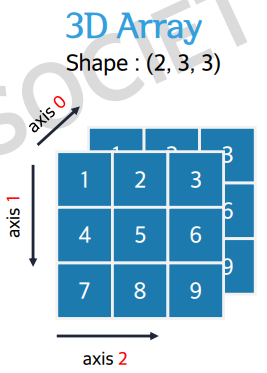
- axis를 0(또는 -3)로 하면 깊이를 기준으로 더하라는 의미로, 서로 마주하는 요소 값을 더해 하나로 만든다.
- axis를 1(또는 -2)로 하면 행 축을 기준으로 더하라는 의미로, 각 행에 있는 열의 값을 더해 하나로 만든다.
- axis를 2(또는 -1)로 하면 열 축을 기준으로 더하라는 의미로, 각 열에 있는 행의 값을 더해 하나로 만든다.

In [ ]:
# (3,2,4)
# 2행 4열짜리가 3개의 판으로 이루어져있다.
# axis=0라면 마주보는 판끼리의 원소 합을 더하게 됨.

In [19]:
import numpy as np

array1 = np.array([[1,2],[3,4]])
print(array1)
print(array1.shape) #2행2열
print('-'*30)

a = [[[1,2,3],
      [4,5,6]],
     [[7,8,9],
      [10,11,12]]]
array2 = np.array(a)
print(array2)
print(array2.shape) #2행3열짜리가 2판 있는 것
print('-'*30)

[[1 2]
 [3 4]]
(2, 2)
------------------------------
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
(2, 2, 3)
------------------------------


In [40]:
print('2차원 배열의 axis=0 기준의 합: ', end='')
print(np.sum(array1, axis=0)) #[4 6]

print('2차원 배열의 axis=1 기준의 합: ', end='')
print(np.sum(array1, axis=1)) #[3 7]

print()

print('3차원 배열의 axis=0 기준의 합: ')
print(np.sum(array2, axis=0))
# [[ 8 10 12]
# [14 16 18]]

print('3차원 배열의 axis=1 기준의 합: ')
print(np.sum(array2, axis=1))
# [[ 5  7  9]
#  [17 19 21]]

print('3차원 배열의 axis=2 기준의 합: ')
print(np.sum(array2, axis=2))
# [[ 6 15]
#  [24 33]]

2차원 배열의 axis=0 기준의 합: [4 6]
2차원 배열의 axis=1 기준의 합: [3 7]

3차원 배열의 axis=0 기준의 합: 
[[ 8 10 12]
 [14 16 18]]
3차원 배열의 axis=1 기준의 합: 
[[ 5  7  9]
 [17 19 21]]
3차원 배열의 axis=2 기준의 합: 
[[ 6 15]
 [24 33]]


# Numpy의 특징

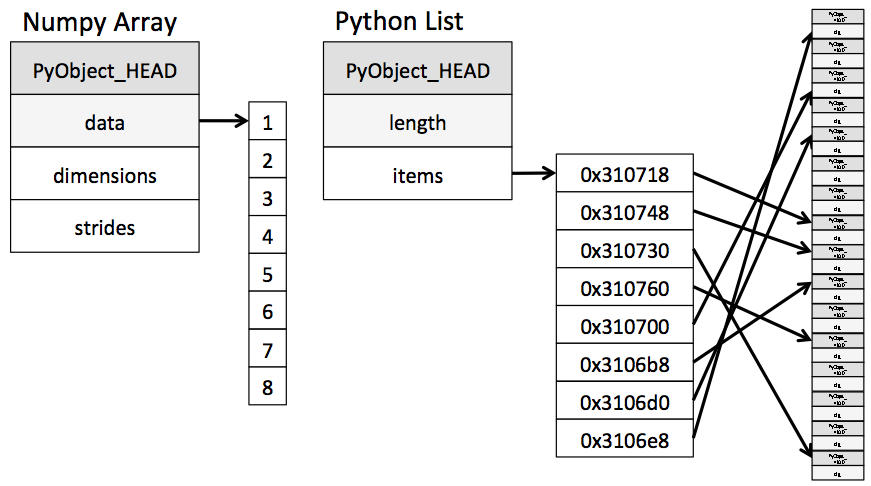

- 파이썬 리스트는 포인터(실제값이 저장된 곳의 주소)의 배열
    - 따라서 각각 객체가 메모리 여기저기 흩어져 있어서 값의 참조가 느리다.

- 반면, ndarray는 다차원 데이터도 연속된 메모리 공간에 할당
    - 따라서 효율적인 메모리 사용이 가능하다

# 배열 생성 - 1

## array()를 이용한 생성
- 가장 기본적인 방법 : array 함수를 사용하여 일반적인 파이썬의 리스트 또는 튜플에서 배열을 만드는 것
    - 파이썬의 list는 하나의 리스트 안에 여러 종류의 데이터를 넣을 수 있다 (문자열, 숫자 섞어서)
    - 넘파이의 다차원 배열의 모든 원소는 **동일한 데이터 타입** 을 가져야 한다.

In [14]:
array = np.array([[1,2],[3,4]], dtype='float') # np.float으로도 dtype 지정 가능
array = np.array([[1,2],[3,4]], np.float32)
print(array)

# 실수형으로 선언되었으므로 결과값에 .이 붙는다

[[1. 2.]
 [3. 4.]]


### 형 변환
- 데이터가 정수로 입력되더라도 data type을 실수형으로 명시한다면, 실수형으로 자동 형변환이 일어난다.

In [2]:
a = np.array(['1','2',3,4], np.float16)
print(a)

# 실수형으로 자동 형변환되었으므로 결과값에 .이 붙는다

[1. 2. 3. 4.]


## arange()를 이용한 생성
- 일련의 연속된 숫자를 생성하는 파이썬의 range() 내장 함수와 유사

In [21]:
import numpy as np

a = np.arange(1,10)
print(a)
# [1 2 3 4 5 6 7 8 9]

b = np.arange(10,30,5)
print(b)
# [10 15 20 25]

c = np.arange(10)
print(c)

[1 2 3 4 5 6 7 8 9]
[10 15 20 25]
[0 1 2 3 4 5 6 7 8 9]


## Numpy 배열의 주요 속성

1) **ndarray.shape**
- numpy array 넘파이 배열의 차원을 튜플 타입으로 반환

2) **ndarray.dtype**
- 배열의 자료형을 반환

3) **ndarray.ndim**
- 배열의 차수(차원)을 정수 값으로 반환

4) **ndarray.size**
- 배열의 요소의 총 개수를 정수 값으로 반환
- shape의 모든 값이 곱이 된다.

5) **ndarray.nbytes**
- 배열의 메모리 크기 반환

In [7]:
# 1차원 배열
a = np.array([1,2,3,4,5])

print(a)
print(a.dtype) # int32 (DEFAULT는 32비트로서 2억개의 비트를 표현 가능하다. 즉,약 5천만 개 미만의 숫자 표현 가능 / 그 이상은 64비트 ex) 유튜브 조회수를 64비트로 바꾼 사례)
print(a.ndim)  # 1 (1차원 백터)
print(a.shape) # (5,)
print(a.size)  # 5
print(a.nbytes) # 20비트 (메모리 공간에서 20바이트를 차지 // 8비트 = 1바이트 // 숫자는 4비트)

[1 2 3 4 5]
int32
1
(5,)
5
20


In [48]:
# 2차원 배열
a = np.array([[1,2],[3,4],[5,6]])

print(a)
print(a.dtype) # int32
print(a.ndim)  # 2
print(a.shape) # (3, 2)
print(a.size)  # 6
print(a.nbytes) # 24비트 (8비트가 1바이트 // 영어와 숫자는 4비트 // 한글은 8비트 )

[[1 2]
 [3 4]
 [5 6]]
int32
2
(3, 2)
6
24


# 배열 생성 -2
- `zeros` : 지정된 shape의 배열을 생성하고, 모든 요소를 0으로 초기화
- `ones` : 지정된 shape의 배열을 생성하고, 모든 요소를 1으로 초기화
- `full` : 지정된 shape의 배열을 생성하고, 모든 요소를 지정한'fill_value'로 초기화
- `empty` : 메모리의 상태에 따라 초기 값이 임의로 설정되는 요소로 이루어진 배열을 생성
- `*_like` : 기존의 배열과 shape이 같은 배열을 생성하되, 요소는 다르게 (zeros_like, ones_like...)

- np. ()     : numpy 패키지에서 호출
- ndarray.() : 생성된 다차원 배열 객체를 가지고 필드나 함수 호출

## numpy.zeros()

In [3]:
import numpy as np

a = np.zeros(4,)
b = np.zeros(4, dtype=np.int64)
c = np.zeros((4,3))

print(a) # 실수형 다차원 배열
print(b) # 정수형 다차원 배열
print(c) # 다차원 배열

d = np.array([[1,2,3],[4,5,6],[7,8,9]])
e = np.zeros_like(d)
print(d)
print(e)

[0. 0. 0. 0.]
[0 0 0 0]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[0 0 0]
 [0 0 0]
 [0 0 0]]


## numpy.ones()

In [4]:
print(np.ones(2,))
print(np.ones((2,3)))
print(np.ones((2,3), dtype=int))

d = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(d)
print(np.ones_like(d))

[1. 1.]
[[1. 1. 1.]
 [1. 1. 1.]]
[[1 1 1]
 [1 1 1]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]


## numpy.full()

In [24]:
print(np.full((2,), 1))
print(np.full((2,2), 10))
print(np.full((2,2), 0.1))

d = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(d)
print(np.full_like(d, 7))

[1 1]
[[10 10]
 [10 10]]
[[0.1 0.1]
 [0.1 0.1]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[7 7 7]
 [7 7 7]
 [7 7 7]]


## [연습문제]
- 1~10 사이의 값에 대해 다음의 조건에 맞는 2차원 배열을 생성하시오.
- 첫 번째 행은 역순으로 나열된 홀수 정수의 요소를 갖고, 두 번째 행은 짝수 정수의 요소를 갖는다.

In [84]:
import numpy as np

col1 = np.arange(9,0,-2)
col2 = np.arange(2,11,2)
print(col1)
print(col2)

ndarray = np.array([col1, col2])
print(ndarray)

[9 7 5 3 1]
[ 2  4  6  8 10]
[[ 9  7  5  3  1]
 [ 2  4  6  8 10]]


In [86]:
# A

a = np.array([np.arange(9,0,-2), np.arange(2,11,2)])
print(a)

[[ 9  7  5  3  1]
 [ 2  4  6  8 10]]


# 배열 생성 -3

## numpy.linspace()
- start부터 stop의 범위에서 num개를 균일한 간격으로 데이터를 생성하고 배열을 만드는 함수
- 요소 개수를 기준으로 균등 간격의 배열을 생성

In [87]:
print(np.linspace(0,2,9))
# [0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]
# 0 이상 2이하의 범위를 9개로 등분하여 요소를 생성

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75 2.  ]


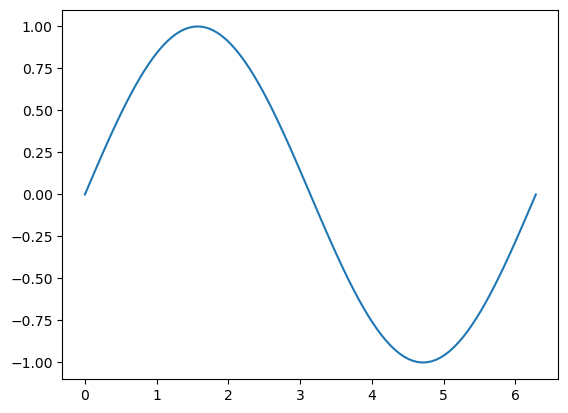

In [92]:
from numpy import pi

x = np.linspace(0, 2*pi, 100)
f = np.sin(x)
# print(f)

# sin 곡선 그리기
import matplotlib.pyplot as plt
plt.plot(x, f)
plt.show()

## numpy.identity(), numpy.eye()
- 지정한 크기의 정방 단위행렬을 생성
    - 주대각선 : (0,0 1,1 2,2 ~ n,n)
    - 단위행렬 : 주대각선의 원소가 모두 1이며, 나머지 원소는 모두 0인 행렬
    - 정방 행렬 : 가로 세로 길이가 같은 행렬
    - 정방 단위행렬 : 주대각선의 원소가 모두 1이며, 나머지 원소는 모두 0인 정사각형 행렬

- identity는 정방 단위 행렬만 생성 가능
- eye는 기타 단위행렬도 생성 가능 
    - eye는 정방 행렬이 아닌 단위행렬도 만들어낸다. 즉, 행과 열의 크기가 다른 단위행렬도 만들어낼 수 있다.

In [5]:
import numpy as np

print(np.identity(2)) # 2행2열짜리의 정방 단위행렬
print(np.identity(3, dtype=int))

[[1. 0.]
 [0. 1.]]
[[1 0 0]
 [0 1 0]
 [0 0 1]]


In [32]:
# eye() 함수는 행과 열의 크기가 다른 단위행렬도 만들 수 있다.
print(np.eye(3))   # 3행3열짜리의 정방 단위행렬
print(np.eye(3,4)) # 3행4열짜리의 정방 단위행렬
print('-'*30)

# 세 번째 값 : 대각선 인덱스
# 0(기본값)은 주대각선을 나타내고 (DEFAULT가 0이다)
# 양수 값은 위쪽 대각선 (열)을 나타내고
# 음수 값은 아래쪽 대각선 (행)을 나타낸다.
print(np.eye(3,4,1))  # 3행4열짜리의 정방 단위행렬 + 주 대각선의 시작값은 1
print(np.eye(3,4,-1)) # 3행4열짜리의 정방 단위행렬 + 주 대각선의 시작값은 -1

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
------------------------------
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]
[[0. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


# 배열의 변경

## numpy.reshape() / ndarray.reshape()
- <font color='red'><b> 원본을 변경하지 않고 새로운 배열을 생성한다 </b></font>
- 원본은 그대로 살아있음
- 대상 배열의 요소 개수가 원본 배열과 동일 해야한다
- numpy 객체가 아닌 다차원 배열 ndarray로도 reshape 가능하다

In [38]:
a = np.arange(6)
print(a) # 1차원 백터

b = a.reshape((3,2))  # b = np.reshape(a, (3,2)) 와 동일
print(b)
# 원본 배열의 원소 개수와 동일하게 해야한다

print('-'*30)
# (행의 크기를 전체 요소 개수에 맞춰 알아서 지정)
c = np.reshape(a, (-1,2)) 
print(c) # 열의 크기를 2에 맞추고, 행의 크기는 거기에 맞춰서 알아서 지정하여 만들어라

print('-'*30)
d = np.arange(1,11).reshape(2,5)
print(d) # 1부터 10까지의 연속된 원소를 2행5열로

print('-'*30)
e = d.reshape((-1,2,1))
print(e) # 2행1열로 만들되 차원의 갯수인 depth는 알아서

# 1차원 백터로 되돌리고 싶을 때 쓰면 되는 방법
print('-'*30)
f = e.reshape((-1))
print(f)  # 행렬의 값이 없으므로 요소를 한 줄로 나타낸다.

[0 1 2 3 4 5]
[[0 1]
 [2 3]
 [4 5]]
------------------------------
[[0 1]
 [2 3]
 [4 5]]
------------------------------
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
------------------------------
[[[ 1]
  [ 2]]

 [[ 3]
  [ 4]]

 [[ 5]
  [ 6]]

 [[ 7]
  [ 8]]

 [[ 9]
  [10]]]
------------------------------
[ 1  2  3  4  5  6  7  8  9 10]


## numpy.resize() / ndarray.resize()
- <font color='red'><b> 원본 배열을 새로운 shape로 수정한다 </b></font>
- 원본을 바꿔버림
- 대상 배열의 요소 개수가 원본 배열과 동일하지 않으면 크기를 강제로 조정한다
- 자리가 부족하면 잘라내고, 자리가 남으면 나머지를 0으로 채워버림
- numpy 객체가 아닌 다차원 배열 ndarray로도 reshape 가능하다

In [36]:
a = np.arange(11)
a.resize(3,4)
print(a) # 원본의 모양을 변경한다
print('-'*30)

a.resize((4,4)) # 원본의 크기가 달라도 오류를 발생시키지 않는다
print(a)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10  0]]
------------------------------
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10  0]
 [ 0  0  0  0]]


## ndarray.flatten() / ndarray.ravel()
- 배열을 1차원 벡터로 만든다.
- flatten은 원본에 영향 X
- ravel은 원본에 영향 O / 원본을 수정

In [134]:
a = np.array([[1,2],[3,4]])
b = a.flatten()
print(a)
print(b)

a[1,1] = 5 # 0의 0번은 1 / 0의 1번은 2 / 1의 0번은 3 / 1의 1번은 4
print(a)
print(b)


print('-'*15)


a = np.array([[1,2],[3,4]])
b = a.ravel()
print(a)
print(b)

a[1,1] = 5 # 0의 0번은 1 / 0의 1번은 2 / 1의 0번은 3 / 1의 1번은 4
print(a)
print(b)

[[1 2]
 [3 4]]
[1 2 3 4]
[[1 2]
 [3 5]]
[1 2 3 4]
---------------
[[1 2]
 [3 4]]
[1 2 3 4]
[[1 2]
 [3 5]]
[1 2 3 5]


## numpy.expand_dims()
- 차원을 확장
- 지정한 axis의 위치에 넘파이 배열의 차원을 늘려줌

In [6]:
a = np.array([1,2])
print(a)
print(a.shape)
print('-'*30)

# 1차원에서 (첫 번째 축) 행 축을 추가하여 (axis=0) 2차원으로 늘린다.
b = np.expand_dims(a, axis=0)
print(b) # 2의 앞에 1이 추가되어 (1,2)의 모양으로 확장이 됨
print(b.shape)
print('-'*30)

 # 1차원에서 (두 번째 축) 열 축을 추가하여 (axis=1) 2차원으로 늘린다.
c = np.expand_dims(a, axis=1)
print(c) # 2의 뒤에 1이 추가되어 (2,1)의 모양으로 확장이 됨
print(c.shape)

[1 2]
(2,)
------------------------------
[[1 2]]
(1, 2)
------------------------------
[[1]
 [2]]
(2, 1)


In [142]:
a = np.arange(1,7).reshape(2,3)
print(a)
print(a.shape)
print('-'*30) #(2, 3)

# 2차원에서 (첫 번째 축) 깊이 축을 추가하여 (axis=0) 3차원으로 늘린다.
b = np.expand_dims(a, axis=0)
print(b)
print(b.shape) #(1, 2, 3)
print('-'*30)

# 2차원에서 (두 번째 축) 행 축을 추가하여 (axis=1) 3차원으로 늘린다.
c = np.expand_dims(a, axis=1)
print(c)
print(c.shape) #(2, 1, 3)
print('-'*30)

# 2차원에서 (세 번째 축) 열 축을 추가하여 (axis=2) 3차원으로 늘린다.
d = np.expand_dims(a, axis=2)
print(d)
print(d.shape) #(2, 3, 1)
print('-'*30)

[[1 2 3]
 [4 5 6]]
(2, 3)
------------------------------
[[[1 2 3]
  [4 5 6]]]
(1, 2, 3)
------------------------------
[[[1 2 3]]

 [[4 5 6]]]
(2, 1, 3)
------------------------------
[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]]
(2, 3, 1)
------------------------------


### newaxis
- ndarray[np.newaxis, :]
- newaxis 필드를 이용한 차원 확장도 가능하다

In [146]:
# 1행 1열 조회하는 방법
a = np.arange(1,7).reshape(2,3)
print(a)

# 파이썬의 리스트
a[1][1]

# numpy의 다차원 배열
a[1][1]
a[1,1]

[[1 2 3]
 [4 5 6]]


5

In [23]:
a = np.arange(4)
print(a)
print(a.shape) # (4,) # 1차원 벡터

# 행 쪽에 새로운 축을 만들고, 열에는 기존의 데이터를 모두 가져와 넣기
b = a[np.newaxis, :]
print(b)
print(b.shape) # (1, 4) # 2차원 행렬

# 열 쪽에 새로운 축을 만들고, 행에는 기존의 데이터를 모두 가져와 넣기
c = a[:, np.newaxis]
print(c)
print(c.shape) # (4, 1) # 2차원 행렬


[0 1 2 3]
(4,)
[[0 1 2 3]]
(1, 4)
[[0]
 [1]
 [2]
 [3]]
(4, 1)


- 입력값의 형태는 스칼라가 아니라 백터 형태로 차원을 늘려줘야 함
- 원소가 하나더라도 스칼라는 인식하지 못하므로 [] 안에 넣어줘야 함.
- [1,2,3,4,5] >> [[1],[2],[3],[4],[5]]

## ndarray.astype()
- 배열의 타입을 변경

In [158]:
a = np.array([1,2,3])
print(a) # [1 2 3]
print(a.dtype) # int32

a_float = a.astype(np.float32)
print(a_float) # [1. 2. 3.]
print(a_float.dtype) # float32

[1 2 3]
int32
[1. 2. 3.]
float32


## numpy.squeeze()
- 차원 축소

In [164]:
a = np.array([[[0],[1],[2]]])
print(a)
print(a.shape) # (1, 3, 1)
print('-'*30)

# 축 옵션을 주지 않으면 1차원 벡터로 만든다 (결국 flatten, ravel 등과 동일)
b = np.squeeze(a)
print(b)
print(b.shape) # (3,)
print('-'*30)

# 깊이 축 축소
c = np.squeeze(a, axis=0)
print(c)
print(c.shape) # (3,1)
print('-'*30)

# 행 축 축소
# d = np.squeeze(a, axis=1)
# print(d)
# print(d.shape) # (1,1) # 원본의 원소 개수와 일치되지 않으므로 Error 발생
# print('-'*30)

# 열 축 축소
e = np.squeeze(a, axis=2)
print(e)
print(e.shape) # (1, 3)
print('-'*30)

[[[0]
  [1]
  [2]]]
(1, 3, 1)
------------------------------
[0 1 2]
(3,)
------------------------------
[[0]
 [1]
 [2]]
(3, 1)
------------------------------
[[0 1 2]]
(1, 3)
------------------------------


## numpy.concatenate()
- 두 개 이상의 배열을 연결
- 단, 연결하고자 하는 배열의 **차원 수**가 같아야 한다.

In [40]:
a = np.array([[1,2],[3,4]])
print(a) # 2차원
print('-'*30)

b1 = np.array([5,6])
print(b1) # 1차원
print('-'*30)

# np.concatenate((a,b1)) # 차원의 개수가 다르므로 Error 발생

b2 = np.array([[5,6]])
print(b2) # 2차원
print('-'*30) 

c = np.concatenate((a,b2)) # 차원의 개수가 같으므로 성공
# DEFAULT는 axis=0. 즉, 행으로 연결
print(np.concatenate((a,b2)))

[[1 2]
 [3 4]]
------------------------------
[5 6]
------------------------------
[[5 6]]
------------------------------
[[1 2]
 [3 4]
 [5 6]]
(3, 2)


- axis 인수를 설정해서 연결 방향을 정할 수 있다. (default: axis=0)
    - axis=0 : 행 방향으로 연결할 때에는 열의 갯수가 같아야 한다.
    - axis=1 : 열 방향으로 연결할 때에는 행의 갯수가 같아야 한다.

In [42]:
print(a)
print('-'*30)
print(c)
print('-'*30)

d = np.concatenate((a,c), axis=0) # 열의 개수가 같으므로 성공
# d = np.concatenate((a,c), axis=1) # 행의 개수가 다르므로 Error
print(d)
print('-'*30)

########### 전치 (주대각선을 기준으로 행과 열의 위치를 교환) ##############
d = np.concatenate((a,c.T), axis=1)
print(d)
print('-'*30)

[[1 2]
 [3 4]]
------------------------------
[[1 2]
 [3 4]
 [5 6]]
------------------------------
[[1 2]
 [3 4]
 [1 2]
 [3 4]
 [5 6]]
------------------------------
(5, 2)
[[1 2 1 3 5]
 [3 4 2 4 6]]
------------------------------
(2, 5)


# 기본 연산
- Numpy 배열의 산술 연산자는 **요소별**로 적용된다.

## 산술 연산

In [44]:
import numpy as np

a = np.arange(9.0).reshape(3,3) # 0부터 8까지 실수로 된 데이터가 3행3열로
b = np.arange(3.0)

print(a) # 2차원
print('-'*30)
print(b) # 1차원
print('-'*30)


# broadcasting : 서로 차원이 다른 데이터의 경우, 작은 차원의 데이터가 큰 차원의 데이터에 맞춰 차원이 확장된다.
# 피연산자는 2차원이므로 1차원이었던 연산자 [0. 1. 2.]가 2차원으로 확장된 것
print(np.add(a,b))
print(a+b)
print('-'*30)

print(np.subtract(a,b))
print(a-b)
print('-'*30)

print(np.multiply(a,b))
print(a*b)
print('-'*30)

print(np.divide(a,4))
print(a/4)
print('-'*30)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
------------------------------
[0. 1. 2.]
------------------------------
[[ 0.  2.  4.]
 [ 3.  5.  7.]
 [ 6.  8. 10.]]
[[ 0.  2.  4.]
 [ 3.  5.  7.]
 [ 6.  8. 10.]]
------------------------------
[[0. 0. 0.]
 [3. 3. 3.]
 [6. 6. 6.]]
[[0. 0. 0.]
 [3. 3. 3.]
 [6. 6. 6.]]
------------------------------
[[ 0.  1.  4.]
 [ 0.  4. 10.]
 [ 0.  7. 16.]]
[[ 0.  1.  4.]
 [ 0.  4. 10.]
 [ 0.  7. 16.]]
------------------------------
[[0.   0.25 0.5 ]
 [0.75 1.   1.25]
 [1.5  1.75 2.  ]]
[[0.   0.25 0.5 ]
 [0.75 1.   1.25]
 [1.5  1.75 2.  ]]
------------------------------


In [2]:
import numpy as np

a=np.arange(5)
b=np.true_divide(a,4) #일반적인 나누기 # true_divide = 그냥 divide
c=np.floor_divide(a,4) #파이썬의 // : 몫을 취하는 연산자

print(a)
print(b)
print(c)

[0 1 2 3 4]
[0.   0.25 0.5  0.75 1.  ]
[0 0 0 0 1]


In [3]:
a=np.ones((2,3), dtype=int) #defaul float
print(a)

print('-'*30)
a+=1
print(a)

[[1 1 1]
 [1 1 1]]
------------------------------
[[2 2 2]
 [2 2 2]]


# 통계연산
- 통계연산은 axis와 밀한 관계가 있다
- 축값을 입력하지 않으면 모든 원소에 대한 연산결과를 출력한다

numpy.sum()
- 축을 따라 합을 계산

In [52]:
a=np.arange(12).reshape(3,4)
a=np.arange(1,10).reshape(3,3)
print(a)
print(a.sum()) # 모든 요소의 합을 구함 np.sum(a)

print(a.sum(axis=0)) # 각 열의 합 #np.sum(a, axis=0)
print(a.sum(axis=1)) # 각 행의 합

print(a.cumsum()) # 모든 요소에 대한 누적합
print(a.cumsum(axis=0)) # 열에 대한 누적합
print(a.cumsum(axis=1)) # 행에 대한 누적합

[[1 2 3]
 [4 5 6]
 [7 8 9]]
45
[12 15 18]
[ 6 15 24]
[ 1  3  6 10 15 21 28 36 45]
[[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]
[[ 1  3  6]
 [ 4  9 15]
 [ 7 15 24]]


numpy.mean()
- 축을 따라 산술평균을 계산

In [54]:
a=np.arange(1,10).reshape(3,3)
print(a)

print(np.mean(a)) # 모든 요소의 평균
print(np.mean(a, axis=0)) #열의 평균
print(np.mean(a, axis=1)) #행의 평균

[[1 2 3]
 [4 5 6]
 [7 8 9]]
5.0
[4. 5. 6.]
[2. 5. 8.]


numpy.average()
- 주어진 축에 따라 가중평균을 계산
- avg = sum(a*weight) /sum(weight)
- 분모는 가중치의 합

In [61]:
a=np.arange(1,10).reshape(3,3)
print(a)

print(np.average(a, axis=0, weights=[1/6, 2/6, 3/6]))
print(np.average(a, axis=1, weights=[1/6, 2/6, 3/6]))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[5. 6. 7.]
[2.33333333 5.33333333 8.33333333]


In [93]:
import numpy as np

a = np.arange(6).reshape(3,2)
print(a)

np.average(a, axis=1, weights=[1/4, 3/4])
# 행별로 가중평균 구하기
# 원소가 2개이므로 가중치 2개 부여 가능
# 0.75 = sum(0*(1/4) + 1*(3/4))) / sum(1/4+3/4)
# 가중치의 합이 꼭 1이 아니어도 된다.

[[0 1]
 [2 3]
 [4 5]]


array([0.75, 2.75, 4.75])

numpy.amin(), numpy.min() / numpy.amax(), numpy.max()
- amin : 배열의 최소
- axis을 따른 배열의 최소, 최대치

In [8]:
a = np.arange(1,10).reshape(3,3)
print(a)

print(np.amin(a))
print(np.amin(a, axis=0))
# 행을 기준으로 열의 최소값을 찾아낸 것
print(np.amin(a, axis=1))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
1
[1 2 3]
[1 4 7]


numpy.median()
- axis을 따른 배열의 중앙값

numpy.var(), numpy.std()
- axis을 따른 배열의 분산과 표준편차

numpy.maximum()
- 두 개의 배열을 가져와 요소별 최대값 계산
- broadcasting 될 수 있다

In [8]:
a = np.array([3,6,1])
b = np.array([4,2,9])
print(np.maximum(a,b))

[4 6 9]


## 최소값, 최대값 원소의 아규먼트 위치
- numpy.argmax(): 제일 큰 값 위치 정보
- numpy.argmin(): 제일 작은 값 위치 정보
- numpy.where(조건): 조건에 맞는 값의 위치 정보
- numpy.where(조건, 조건에 맞을 때 값, 조건과 다를 때 값)

In [11]:
a=np.array([5,2,5,7,1,9,4,0,9])
print(np.argmax(a)) # 제일 큰 값의 위치 정보 (최대값이 중복된다면, 가장 먼저 발견된 값의 인덱스)
print(np.argmin(a)) # 제일 작은 값의 위치 정보
# print(np.max(a))
print(np.where(np.max(a)==a))
# 중복 최대값의 인덱스
# np.where(9 == a) -> True의 인덱스를 뽑아줌

5
7
(array([5, 8], dtype=int64),)


In [12]:
print(np.where(a>5)) # 5 이상 값의 위치 정보
print(np.where(a>5, 1, -1)) # 5를 초과하는 것은 1 , 아니면 -1
print(np.where(a>5, 0, a)) # 5를 초과하는 것은 0 , 아니면 원래 값 유지

(array([3, 5, 8], dtype=int64),)
[-1 -1 -1  1 -1  1 -1 -1  1]
[5 2 5 0 1 0 4 0 0]


## 비교연산

- 연산자를 이용하여 요소별 비교
- 결과를 boolean 값으로 반환
- ==, !=, >, >=, <, <=

In [19]:
a= np.array([1,2,3])
b= np.array([4,5,6])
c= np.array([3,2,5])

print(a==b)
print(a==c)
print(np.sum(a==c)) # 원소의 값이 TRUE인 개수

[False False False]
[False  True False]
1


In [23]:
a = np.arange(1,10).reshape(3,3)
print(a)

print(a%2==0)
print(np.sum(a%2==0)) # 짝수 원소의 개수 구하기

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[False  True False]
 [ True False  True]
 [False  True False]]
4


numpy.all() / numpy.any()
- all() : 요소 전체가 같아야 하나의 True
- any() : 요소 전체 중 하나만 같아도 True

In [17]:
a= np.array([1,2,3])
b= np.array([1,2,3])
c= np.array([3,2,5])

print(np.all(a==b))
print(np.all(a==c)) 
print(np.any(a==c)) 

True
False
True


## 논리 연산
- np.logical_and(), np.logical_or(), np.logical_not(), np.logical_xor()

In [31]:
a = np.arange(1,11).reshape(2,5)
print(a)

b = a%2==0
print('b 행렬: 짝수면 True, 홀수면 False')
print(b)
print()

c = a >=4
print('c 행렬: 4이상이면 True, 아니면 False')
print(c)
print()

print('b and c 행렬')
print(np.logical_and(b,c)) # 짝수이면서 4보다 큰 배열
print(np.sum(np.logical_and(b,c))) # 짝수이면서 4보다 큰 원소의 개수
print(a[np.logical_and(b,c)]) #짝수이면서 4보다 큰 원소의 값을 뽑아내기(boolean indexing)_ 마스킹값이 필요함 (인덱스를 골라서, 쭉쭉 순서대로 해줘야함)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
b 행렬: 짝수면 True, 홀수면 False
[[False  True False  True False]
 [ True False  True False  True]]

c 행렬: 4이상이면 True, 아니면 False
[[False False False  True  True]
 [ True  True  True  True  True]]

b and c 행렬
[[False False False  True False]
 [ True False  True False  True]]
4
[ 4  6  8 10]


## 정렬

In [66]:
np.random.seed(10) #난수는 컴퓨터의 시간에 따라/ seed는 저장
data=np.random.randint(1,50,10) #1에서 50사이의 10개의 랜덤정수
#파이썬에서 randint는 하나의 정수값만 호출
#넘파이에서는 지정된 쉐입에맞는 다차원 행렬을 출력해줌
data

array([10, 37, 16,  1, 29, 26, 30, 49, 30,  9])

np.sort()
- 데이터를 오름차순으로 정렬(파이썬의 sort와 동일)
- 파이썬에서는 reverse가 있지만, **넘파이는 없음**

In [34]:
np.sort(data)

array([ 1,  9, 10, 16, 26, 29, 30, 30, 37, 49])

In [35]:
np.sort(data)[::-1]

array([49, 37, 30, 30, 29, 26, 16, 10,  9,  1])

np.argsort()
- 오름차순으로 정렬한 데이터의 정렬 전 인덱스 값을 반환한다

In [38]:
# 원본 data : [10, 37, 16,  1, 29, 26, 30, 49, 30,  9]
# 정렬 후 data : [ 1,  9, 10, 16, 26, 29, 30, 30, 37, 49]
print('원본데이터', data)
print('sorting 데이터', np.sort(data))

print('argsort', np.argsort(data))
#array([3, 9, 0, 2, 5, 4, 6, 8, 1, 7], dtype=int64)
np.argsort(data)

원본데이터 [10 37 16  1 29 26 30 49 30  9]
sorting 데이터 [ 1  9 10 16 26 29 30 30 37 49]
argsort [3 9 0 2 5 4 6 8 1 7]


array([3, 9, 0, 2, 5, 4, 6, 8, 1, 7], dtype=int64)

In [39]:
# argsort를 이용한 정렬
idx=np.argsort(data)  #오름차순으로 정렬한 데이터의 index값가져오기
print(data[idx]) #원데이터의 위치값으로 인덱싱한것 / idx배열의 값으로 데이터 행렬을 indexing 한 결과

[ 1  9 10 16 26 29 30 30 37 49]


### [문제] 학생이름과 정수데이터를 이용하여 성적이 우수한 학생 순서로 이름을 출력하시오

In [53]:
name = ['홍길동', '저팔계', '사오정', '전우치', '삼장법사']
score = [75,100,95,56,99]

name = np.array(name)
score = np.array(score)
idx = np.argsort(score)
# print(idx)
print(name[idx]) # 성적인 낮은 학생 순서대로
print(name[idx][::-1]) # 성적인 높은 학생 순서대로

['전우치' '홍길동' '사오정' '삼장법사' '저팔계']
['저팔계' '삼장법사' '사오정' '홍길동' '전우치']


# 행렬연산

## * 연산자
- 형태(shape)가 동일한 두 행렬을 원소끼리 곱하는 연산자
- **교환법칙 성립** (a x b = b x a)

In [54]:
import numpy as np

a = np.array([[1,1],[0,1]])
b = np.array([[2,0],[3,4]])

print(a*b)
print(b*a) # 교환법칙 성립

[[2 0]
 [0 4]]
[[2 0]
 [0 4]]


## numpy.dot()
- 두 벡터의 내적을 계산하는 함수
    - 내적 : 백터에서 서로 대응하는 성분끼리 곱한 다음 그것들을 모두 더한 것
    - 내적의 결과 : 단일값인 스칼라
    - a·b 또는 <a,b> 로 표현 : a1b1 + a2b2 + a3b3 + ...+ anbn
- 행렬 곱에서도 사용 가능하지만, numpy의 공식문서에서는 numpy.matmul() 라는 matrix multiply 사용을 권장한다

In [67]:
a = np.array([3,4,6,3,9])
b = np.array([6,8,1,2,5])
c = np.dot(a,b) # 3*6 + 4*8 + 6*1 + 3*2 + 9*5
d = np.dot(b,a)

print(c)
print(d)

107
107


In [20]:
# 행렬 곱에 적용

a = np.array([[1,1],[0,1]])
b = np.array([[2,0],[3,4]])
print(np.dot(a,b))
print(np.dot(b,a)) # 행렬곱은 교환법칙 성립 안함

# 행렬 곱의 전제조건 : 양쪽의 행의 개수가 같아야 한다

# 1*2+1*3
# 1*0+1*4
# 0*2+1*3
# 0*0+1*4
# [[5,4]
#  [3,4]]

# 벡터 : 1차원 배열
# 행렬 : 행과 열을 가진 다차원 배열
# 배열 : 집합형 데이터 // 벡터와 행렬보다 상위 개념

[[5 4]
 [3 4]]
[[2 2]
 [3 7]]


## numpy.matmul() / @ 연산자
- 행렬곱 연산을 수행

In [60]:
a = np.array([[1,1],[0,1]])
b = np.array([[2,0],[3,4]])

print(np.matmul(a,b))
print(a@b)

[[5 4]
 [3 4]]
[[5 4]
 [3 4]]


## dot() 과 matmul() 의 차이
- dot()은 행렬과 상수의 곱셈이 가능하나 matmul()은 Error 발생
- 3차원 이상의 행렬곱 (Tensor Multiplication)을 수행할 경우 결과가 다르다

In [66]:
a = np.array([[1,1],[0,1]])

print(np.dot(a,2))
# print(np.matmul(a,2)) # 에러발생

[[2 2]
 [0 2]]


## 전치 (Transpose)
- 전치는 기존 행렬의 행과 열을 교환하는 것
- 즉, 주대각선을 기준으로 반사 대칭하는 것을 의미한다.
- 배열 객체의 'T' 속성 또는 transpose() 함수를 사용한다.

In [69]:
a = np.array([[1,2],[3,4]])
print(a)

print(a.T)
print(a.transpose())
print(np.transpose(a))
# 1차원 배열인 벡터를 전치시킬 경우, 원본과 변동이 그대로 (행과 열의 개념이 없으므로)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[[1 3]
 [2 4]]
[[1 3]
 [2 4]]


# 인덱싱, 슬라이싱

In [78]:
a = [[1,2,3,4,5],[6,7,8,9,10]]
print(a[0][0]) #1

a = np.array(a)
print(a[0][0]) #1
print(a[0,0]) #1 #파이썬 List에서는 표현 불가
# 파이썬의 리스트와 달리 numpy에서는 [][] 말고도 [ , ]가 가능

1
1
1


## Boolean indexing (masking)

In [84]:
a = np.arange(1,25).reshape(4,6)
print(a)

# a 배열에서 요소의 값이 짝수인 요소들의 총합은?
# masking 배열= T또는 F가 나오는 배열
even_arr = a%2 == 0
print(even_arr) #=masking 배열
print('짝수 요소들의 갯수: ', np.sum(even_arr)) #12
print(a[even_arr]) # a[a%2 == 0] 와 동일
print('짝수 요소들의 총합: ', np.sum(a[even_arr])) # 156

[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]]
[[False  True False  True False  True]
 [False  True False  True False  True]
 [False  True False  True False  True]
 [False  True False  True False  True]]
짝수 요소들의 갯수:  12
[ 2  4  6  8 10 12 14 16 18 20 22 24]
짝수 요소들의 총합:  156


In [86]:
a = np.array([1,4,7,9,0,4,23,6,7,2])
print(a[a>3])

# 파이썬의 인덱싱은 오직 하나의 값이지만,
# 넘파이는 배열의 조건에 부합하면 모두 다 뽑아냄

[ 4  7  9  4 23  6  7]


## Fancy Indexing
- 배열의 각 요소 선택을 **인덱스 배열을 전달하여** 참조하는 방식
- Fancy indexing은 복사본이 생성된다
- 인덱싱을 통해 얻어낸 값은 원본과 무관한 새로운 복사본

In [29]:
a = np.arange(15).reshape(5,3)
print(a)
print('-'*30)

# 0행, 2행만 인덱싱
print(a[[0,2],:])
# [ 행 , 열 ]
print('-'*30)

# 전체 행에 대해 0열과 2열만 인덱싱
print(a[:,[0,2]])
print('-'*30)

# 행의 값만 가져온 것으로 인식
print(a[[1,2]])
print('-'*30)

# 0,2,4행을 가져온 후 그것의 0,2열만 가져오기
print(a[[0,2,4]][:,[0,2]])
print('-'*30)

a_view = a[:1]
print(a_view)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
------------------------------
[[0 1 2]
 [6 7 8]]
------------------------------
[[ 0  2]
 [ 3  5]
 [ 6  8]
 [ 9 11]
 [12 14]]
------------------------------
[[3 4 5]
 [6 7 8]]
------------------------------
[[ 0  2]
 [ 6  8]
 [12 14]]
------------------------------
[[0 1 2]]


## 슬라이싱
- numpy에서의 slicing은 동일한 메모리 영역의 뷰(원본 배열의 부분배열)를 반환한다.
- 즉, 뷰를 변경한 경우, 원본 데이터의 원소도 변경된다.

In [103]:
a = np.arange(1,13).reshape(3,4)
print(a)
print('-'*30)

print(a[0:2, 0:4])
print('-'*30)

print(a[:2, :]) #위와 동일
print('-'*30)

print(a[:2]) #위와 동일
print('-'*30)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
------------------------------
[[1 2 3 4]
 [5 6 7 8]]
------------------------------
[[1 2 3 4]
 [5 6 7 8]]
------------------------------
[[1 2 3 4]
 [5 6 7 8]]
------------------------------


In [105]:
a_view = a[:1]
print(a_view)

# 부분배열을 가져와서 바꾸면 원본이 바뀐다
a_view[0] = [10,20,30,40]
print(a)

[[1 2 3 4]]
[[10 20 30 40]
 [ 5  6  7  8]
 [ 9 10 11 12]]


## 인덱싱 & 슬라이싱 차원
- 정수 인덱싱과 슬라이싱을 혼합해서 사용하면 낮은 차원의 배열이 생성되지만,
- <font color='red'><b> 슬라이싱만 사용하면 원본 배열과 동일한 차원의 배열이 생성된다. </b></font>

In [117]:
a = np.arange(1,13).reshape(3,4)
print(a, a.shape, a.ndim) # 3행4열 # 2차원

# 슬라이싱 사용
print('-'*30, '슬라이싱 사용')
sliced_row = a[:1, :]
print(sliced_row, sliced_row.shape, sliced_row.ndim) # 1행4열 # 2차원

print('-'*30, '인덱싱만 사용')
indexed_row = a[0]
print(indexed_row, indexed_row.shape, indexed_row.ndim) # 4개 # 1차원

print('-'*30, '인덱싱 & 슬라이싱 혼합 사용')
indexed_row2 = a[0, :] # 행은 인덱싱, 열은 슬라이싱
print(indexed_row2, indexed_row2.shape, indexed_row2.ndim) # 4개 # 1차원


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]] (3, 4) 2
------------------------------ 슬라이싱 사용
[[1 2 3 4]] (1, 4) 2
------------------------------ 인덱싱만 사용
[1 2 3 4] (4,) 1
------------------------------ 인덱싱 & 슬라이싱 혼합 사용
[1 2 3 4] (4,) 1


- Fancy Indexing (배열 인덱싱 <-> 정수 인덱싱) 의 경우, 원본과 동일한 차원의 배열이 생성된다.

In [32]:
print('-'*30, 'fancy 인덱싱 & 슬라이싱 혼합 사용')
print(a[[0,2], :])

------------------------------ fancy 인덱싱 & 슬라이싱 혼합 사용
[[0 1 2]
 [6 7 8]]


# Broadcasting

- numpy에서 vector나 matrix 간에 사칙연산을 수행하면, 같은 위치의 원소끼리 계산이 이루어지며 (element-wise)
- 이렇게 되려면 계산하고자하는 vector나 matrix의 형태가 같아야 하는데, 이 때 sahpe이 맞춰지는 것을 broadcasting이라고 한다.
- 따라서 서로 차원이 다른 데이터의 경우, 작은 차원의 데이터가 큰 차원의 데이터에 맞춰 차원이 확장된다.

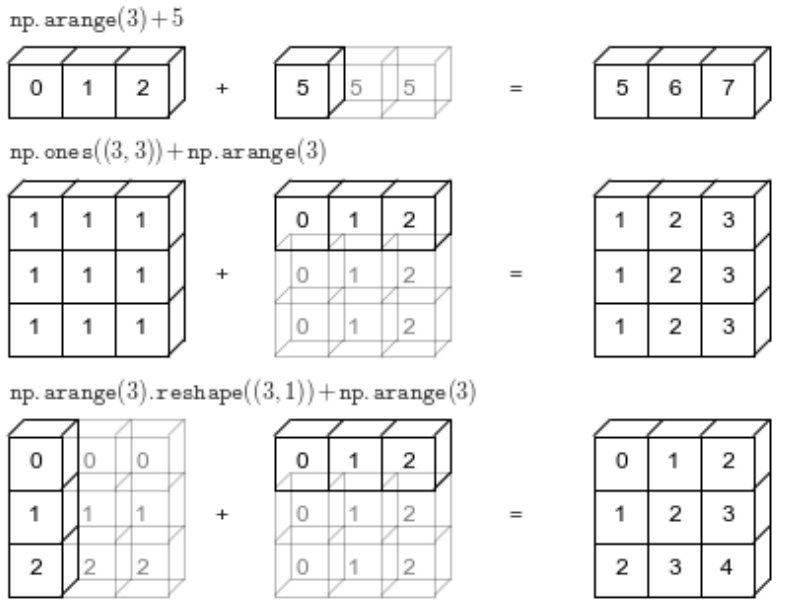

In [125]:
import numpy as np

a = np.array([20,30,40,50])
b = np.arange(4)

print(a-b) # 각 요소마다 연산

print('-'*30)
print([1,2,3]*2) # python의 리스트 * 2 = 리스트를 2번 반복
print(a*2) # numpy의 다차원 배열 * 2 = 연산


# matrix와 vector 간의 연산
print('-'*30)
print(np.ones((4,4)) + a) # matrix + vector # ones는 기본적으로 실수형으로 만듦
print(np.ones((4,4), dtype=int) + a) 

[20 29 38 47]
------------------------------
[1, 2, 3, 1, 2, 3]
[ 40  60  80 100]
------------------------------
[[21. 31. 41. 51.]
 [21. 31. 41. 51.]
 [21. 31. 41. 51.]
 [21. 31. 41. 51.]]
[[21 31 41 51]
 [21 31 41 51]
 [21 31 41 51]
 [21 31 41 51]]


# random 모듈을 이용한 배열의 생성

## numpy.random.rand()
- 0 이상 1 미만의 임의의 균등분포를 갖는 실수를 생성
- (균등분포 : 계속해서 반복하면 0이상 1미만의 값이 균등한 분포로 나타난다)
- shape을 전달하면 그 크기에 맞는 다차원 배열을 생성한다

In [130]:
a = np.random.rand() # [0,1) : 0이상 1미만의 난수 1개 생성
print(a)

b = np.random.rand(3) # 1차원 벡터 생성
print(b)

c = np.random.rand(3,4) # 2차원 배열 생성
print(c)

0.7274355137182333
[0.54088093 0.13145815 0.41366737]
[[0.77872881 0.58390137 0.18263144 0.82608225]
 [0.10540183 0.28357668 0.06556327 0.05644419]
 [0.76545582 0.01178803 0.61194334 0.33188226]]


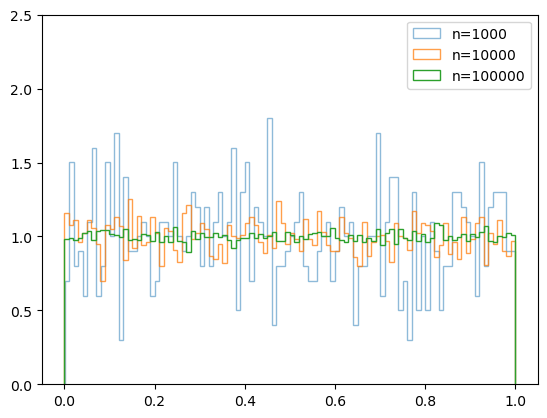

In [133]:
import matplotlib.pyplot as plt

np.random.seed(0)

a = np.random.rand(1000)
b = np.random.rand(10000)
c = np.random.rand(100000)

# 히스토그램 만들기
# bins : 구간의 개수
# density : 확률밀도함수 표현 O
# alpha : 투명도
plt.hist(a, bins=100, density=True, alpha=0.5, histtype='step', label='n=1000')

plt.hist(b, bins=100, density=True, alpha=0.75, histtype='step', label='n=10000')

plt.hist(c, bins=100, density=True, alpha=1, histtype='step', label='n=100000')

# ylim : 최소 최대
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# 샘플 수가 증가할수록 더욱 균일한 분포를 보여준다 -> 균등분포

## numpy.random.randint()
- 주어진 범위의 임의의 균등분포를 갖는 정수를 발생

In [83]:
# 0 이상 3 미만의 임의의 정수 1개 생성
a = np.random.randint(3)
# print(a)

# 0이상 1미만의 임의의 정수 10개 생성
a = np.random.randint(1, size=10)
# print(a)
# 파이썬의 randint는 end 값을 포함했었으나, numpy의 randint는 end 값을 포함하지 않음

# 2이상 5미만의 임의의 정수 1개 생성
a = np.random.randint(2,5)
# print(a)

# 1이상 46미만의 임의의 정수 6개 생성
a = np.random.randint(1,46,6)
# print(a)




#### 2차원의 형태로 만들고 싶다면 shape을 튜플의 형태로 전달하면 된다. ####

# 0이상 100미만의 임의의 정수를 50 X 50 모양으로 생성
a = np.random.randint(0,100, (50,50))
print(a, a.shape) # 50행 50열

[0 0 0 0 0 0 0 0 0 0]
[[42  1 55 ... 95 58 58]
 [65 19 62 ... 55  0 13]
 [81  2 35 ... 51 14 35]
 ...
 [48 91 37 ... 34 29 91]
 [46 99 70 ... 67 16 71]
 [40 45 52 ... 11 24 50]] (50, 50)


## numpy.random.randn()
- 표준정규분포(평균은 0이고 표준편차는 1인 정규분포)로부터 샘플링된 난수를 발생한다.

In [80]:
# 난수 1개 생성
a = np.random.randn()
print(a)

# 난수 10개의 1차원 벡터
a = np.random.randn(10) # 1차원 벡터
print(a)

# 난수 3*4개의 2차원 배열
a = np.random.randn(3,4) # 튜플의 형태가 아닌 정수의 값으로만 전달
print(a)


# 표준정규분포인지 확인하기
a = np.random.randn(100,100)
print(np.std(a)) # 1에 근사한 표준편차 값
print(np.mean(a)) # 0에 근사한 평균 값

-0.9836133512005646
[-1.97045092  0.38047264 -1.46494191 -2.03421729 -0.36472883  0.47818913
 -0.8855081  -0.65270521  1.35035798 -1.37557868]
[[ 1.0495216   0.71850197 -0.73198577  1.836249  ]
 [ 0.36432924  0.7028213   1.03803054  0.89858243]
 [-0.13859733  0.1191022   0.87694143 -0.26579023]]
0.9958346439772882
0.012110930844700683


## numpy.random.choice()
- 주어진 다차원 배열로부터 임의로 추출
- Python의 choice에서는 1개만 뽑아낼 수 있으므로 n개를 뽑기위해서는 sample을 사용해야 했다.
- Numpy의 choice에서는 1개~n개 추출 가능하며, 복원/비복원도 선택할 수 있다.

In [162]:
a = np.random.randint(1,50,15)
print(a)

# replace의 DEFAULT는 True
# replace = True: 중복 샘플링한다. (복원 추출)
# replace = False : 중복 샘플링을 하지 않는다. (비복원 추출)
b = np.random.choice(a, size=(3,), replace=False)
print(b)

b = np.random.choice(a, size=(3,3), replace=False)
print(b)

[33  7  6 15 45 47 22 26 48 31 19 38 16 45 13]
[31 48 22]
[[33 15 47]
 [13 19 45]
 [ 7 16  6]]
